In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
loan=pd.read_csv('C://Users//vansh//Desktop//python gl//CAPSTONE PROJECT 5//LoanStats3a.csv',skiprows=1)

C:\Users\vansh\Anaconda4\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Columns: 144 entries, id to settlement_term
dtypes: float64(110), int64(6), object(28)
memory usage: 46.7+ MB


In [5]:
loan.columns[0:15]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status'],
      dtype='object')

In [6]:
0.30*42535

12760.5

In [7]:
loan.dropna(thresh=12760, axis=1,inplace=True)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 54 columns):
loan_amnt                     42535 non-null int64
funded_amnt                   42535 non-null int64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
desc                          29242 non-null object
purpos

In [9]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

1. funded amount-al amount committed to that loan at that point in time.
2. funded amount invv- The total amount committed by investors for that loan at that point in time.
3. loan amount-The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [10]:
#39791 after this is all the data that dont meet credit policy

### loan_status contains the data whether the loan was paid of or if the person is a defaulter or not
### and it also contains if the person satisfies the credit policy or not
### fully paid and charged of are the 2 catogories

In [11]:
# this will be the target column

In [12]:
# converting the target column

In [13]:
target1=[]
for i in range(len(loan.loan_amnt)):
    if loan.loan_status[i]=='Fully Paid':
        target1.append(1)
    elif loan.loan_status[i]=='Charged Off':
        target1.append(0)
    elif loan.loan_status[i]=='Does not meet the credit policy. Status:Fully Paid':
        target1.append(1)
    elif loan.loan_status[i]=='Does not meet the credit policy. Status:Charged Off':
        target1.append(0)
# defaulters are marked as 0

In [14]:
len(target1)

42535

In [15]:
loan['target']=target1

In [16]:
# creating a new column whether the person meets credit policy or not

In [16]:
loan.target.value_counts()

1    36104
0     6431
Name: target, dtype: int64

In [17]:
credit_policy=[]
for i in range(len(loan.loan_amnt)):
    if loan.loan_status[i] in ['Fully Paid','Charged Off']:
        credit_policy.append(1)
    else:
        credit_policy.append(0)

In [18]:
loan['credit_policy']=credit_policy

In [19]:
loan.target.value_counts()

1    36104
0     6431
Name: target, dtype: int64

In [20]:
loan.drop('loan_status',axis=1,inplace=True)
loan.credit_policy.value_counts()

1    39786
0     2749
Name: credit_policy, dtype: int64

In [21]:
loan.drop(['installment','funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [22]:
loan.emp_title.nunique()

30658

In [23]:
#since there are 30658 unique titles in emp_title it is of less relevance and will make the model complex, hence we will drop it

In [24]:
loan.drop('emp_title',axis=1,inplace=True)

In [25]:
loan.emp_length.value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

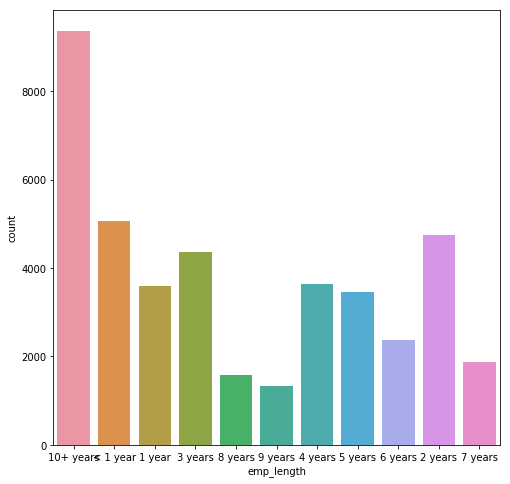

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(loan['emp_length'])

In [27]:
#majority of the loans are given to employee with 10+ years of experience, followed by with less than 1 year

In [28]:
loan.home_ownership.value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [29]:
#checking the values for the person who doesnt have a home
loan[loan.home_ownership=='NONE']

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,target,credit_policy
39387,10000,36 months,7.75%,A,A3,5 years,NONE,22200.0,Not Verified,Jan-08,...,Individual,0.0,0.0,0.0,NaN,0.0,N,N,1,1
39728,4000,36 months,9.64%,B,B4,< 1 year,NONE,100000.0,Not Verified,Aug-07,...,Individual,0.0,NaN,0.0,NaN,NaN,N,N,1,1
39729,2800,36 months,8.70%,B,B1,< 1 year,NONE,120000.0,Not Verified,Aug-07,...,Individual,0.0,NaN,0.0,NaN,NaN,N,N,1,1
42211,15000,36 months,15.65%,F,F3,6 years,NONE,72000.0,Not Verified,Dec-07,...,Individual,0.0,0.0,0.0,NaN,0.0,N,N,0,0
42449,5000,36 months,7.43%,A,A2,< 1 year,NONE,NaN,Not Verified,Aug-07,...,Individual,NaN,NaN,NaN,NaN,NaN,N,N,1,0
42450,7000,36 months,7.75%,A,A3,< 1 year,NONE,NaN,Not Verified,Aug-07,...,Individual,NaN,NaN,NaN,NaN,NaN,N,N,1,0
42480,6700,36 months,7.75%,A,A3,< 1 year,NONE,NaN,Not Verified,Jul-07,...,Individual,NaN,NaN,NaN,NaN,NaN,N,N,1,0
42533,6500,36 months,8.38%,A,A5,< 1 year,NONE,NaN,Not Verified,Jun-07,...,Individual,NaN,NaN,NaN,NaN,NaN,N,N,1,0


In [30]:
#for these people the loan amount and the amount funded is different 

I'm also interested in knowing what this amount funded by investors really means. My assumption is
that it is the share of the loan funded by lenders of the platform, whilst the outstanding amount
would be funded by LC itself. One can also observe that these amounts have rebalanced over time 
with more and more loans being funded mainly by "investors" and less and less loans being funded 
"LC". This can be explained by the fact that LC first funded most of the loans that were listed on
the platform in order to launch the business and gain momentum and popularity among the participants
(i.e. borrowers and lenders), then as the platform became more popular, LC peu à peu withdrew itself 
and let the real lenders fund those loans.
source=https://forum.lendacademy.com/index.php?topic=254.0

In [31]:
date=pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['year']=date.dt.year

C:\Users\vansh\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'average amount')

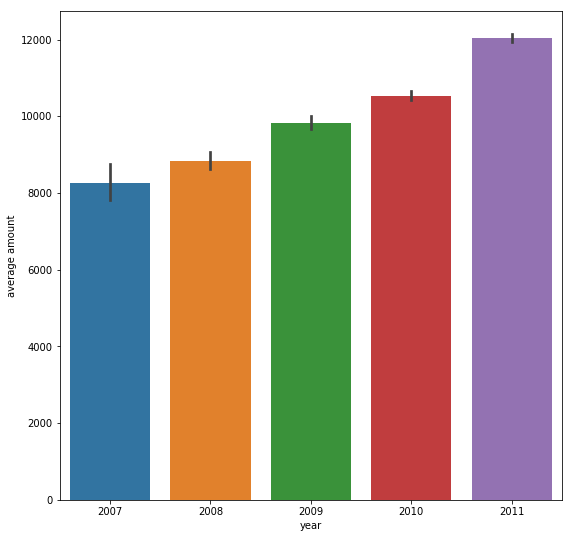

In [32]:
plt.figure(figsize=(9,9))
sns.barplot(loan.year,loan.loan_amnt)
plt.ylabel('average amount')

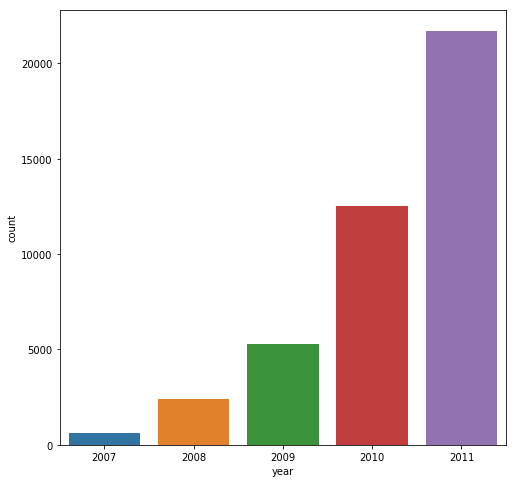

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(loan.year)

In [34]:
#as the year increase the amount of loans passed are also increasing

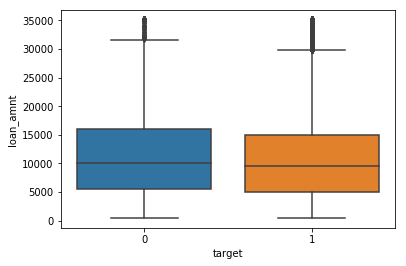

In [35]:
sns.boxplot(loan.target,loan.loan_amnt)

In [36]:
loan.pymnt_plan.value_counts()

n    42535
Name: pymnt_plan, dtype: int64

In [37]:
#since there is no payment plan for the data we can drop it

In [38]:
loan.drop('pymnt_plan',axis=1,inplace=True)

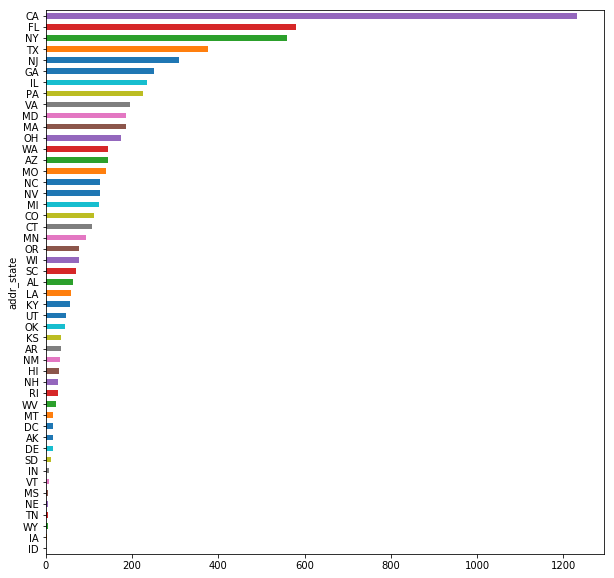

In [39]:
plt.figure(figsize=(10,10))
loan[loan.target==0].groupby('addr_state').target.count().sort_values().plot(kind='barh')
#we can see CA has highest default rate

In [40]:
loan.purpose.value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [41]:
#plotting purpose with respect to the target column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

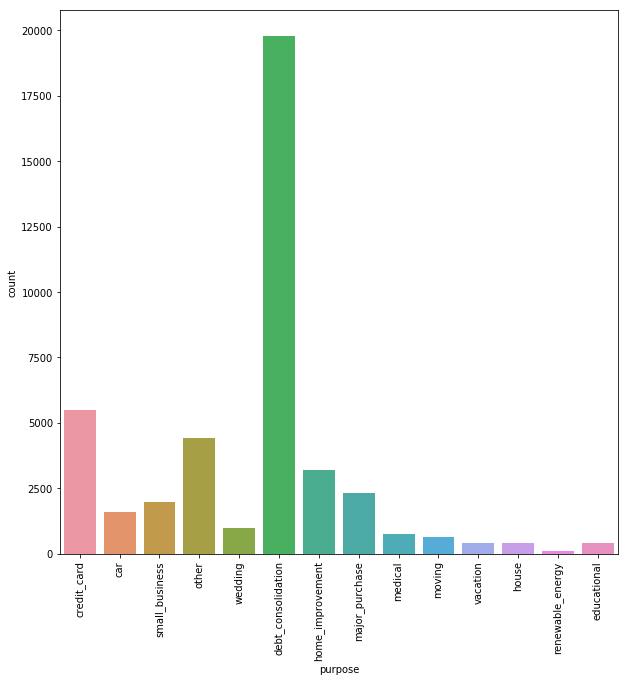

In [42]:
plt.figure(figsize=[10,10])
sns.countplot(loan.purpose)
plt.xticks(rotation=90)


In [43]:
# deleting the description column because the information provided over there has been generalized in the purpose column

In [44]:
loan.title.nunique()
#there are 21253 unique values hence we can drop it

21253

In [45]:
loan.drop('title',axis=1,inplace=True)

In [46]:
print(loan.addr_state.value_counts())
# we have states to generalize the data based upon location hence we can delete zip code
loan.drop('zip_code',axis=1,inplace=True)

CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD      67
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64


In [47]:
#dti=A ratio calculated using the borrower’s total monthly debt payments on the total debt
#obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


C:\Users\vansh\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


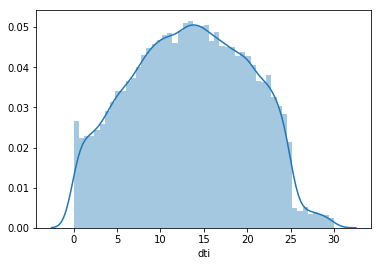

In [48]:
sns.distplot(loan.dti)

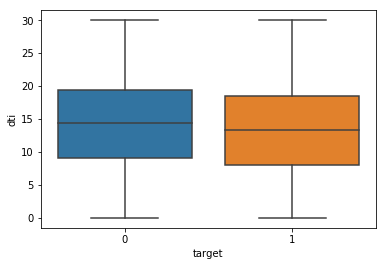

In [49]:
sns.boxplot(loan.target,loan.dti)

In [50]:
#In the personal finance field, the term "delinquent" commonly refers to a situation where a borrower is
#late or overdue on a payment

In [51]:
interest=[]
for i in loan['int_rate']:
    interest.append(float(i.rstrip('%')))

In [52]:
loan['int_rate']=interest

In [53]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 49 columns):
loan_amnt                     42535 non-null int64
term                          42535 non-null object
int_rate                      42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
desc                          29242 non-null object
purpose                       42535 non-null object
addr_state                    42535 non-null object
dti                           42535 non-null float64
delinq_2yrs                   42506 non-null float64
earliest_cr_line              42506 non-null object
inq_last_6mths                42506 non-null float64
mth

In [54]:
loan.verification_status.value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [55]:
loan.drop('desc',axis=1,inplace=True)

In [56]:
loan.corr().target

loan_amnt                    -0.042582
int_rate                     -0.200598
annual_inc                    0.037994
dti                          -0.042198
delinq_2yrs                  -0.019487
inq_last_6mths               -0.110900
mths_since_last_delinq        0.013912
open_acc                      0.005972
pub_rec                      -0.053763
revol_bal                    -0.017186
total_acc                     0.021115
out_prncp                          NaN
out_prncp_inv                      NaN
total_pymnt                   0.245368
total_pymnt_inv               0.242825
total_rec_prncp               0.342275
total_rec_int                 0.017518
total_rec_late_fee           -0.156308
recoveries                   -0.331857
collection_recovery_fee      -0.210536
last_pymnt_amnt               0.220305
collections_12_mths_ex_med         NaN
policy_code                        NaN
acc_now_delinq                0.004095
chargeoff_within_12_mths           NaN
delinq_amnt              

In [57]:
#deleting all the columns that have less than 3% corr
loan.drop(['year','tax_liens','delinq_amnt','acc_now_delinq','total_rec_int','total_acc','revol_bal','open_acc',
           'mths_since_last_delinq','delinq_2yrs'],axis=1,inplace=True)

In [58]:
loan.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
grade                            0
sub_grade                        0
emp_length                    1112
home_ownership                   0
annual_inc                       4
verification_status              0
issue_d                          0
purpose                          0
addr_state                       0
dti                              0
earliest_cr_line                29
inq_last_6mths                  29
pub_rec                         29
revol_util                      90
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_d                    83
last_pymnt_amnt                  0
last_credit_pull_d  

In [59]:
#filling the null values

columns that have null values are
1. emp_length has 1112 null values
2. annual_inc has 4
3. earliest_cr_line,inq_last_6mths,pub_rec has 29
4. revol_util has 90
5. last_pymnt_d has 83
6. collections_12_within 12 mnths has 145
7. chargeoff within 12 mths has 145
8. pub_rec_bankruptcies has 1365

In [60]:
loan[loan.emp_length.isnull()]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,hardship_flag,debt_settlement_flag,target,credit_policy
168,2500,36 months,7.51,A,A3,NaN,OWN,12000.0,Source Verified,Dec-11,...,May-19,0.0,1,Individual,0.0,0.0,N,N,0,1
323,18000,60 months,17.58,D,D4,NaN,MORTGAGE,60000.0,Verified,Dec-11,...,Jul-16,0.0,1,Individual,0.0,0.0,N,N,1,1
394,4000,36 months,11.71,B,B3,NaN,RENT,24000.0,Source Verified,Dec-11,...,May-19,0.0,1,Individual,0.0,0.0,N,N,1,1
422,1000,36 months,14.65,C,C3,NaN,RENT,18408.0,Not Verified,Dec-11,...,Jun-12,0.0,1,Individual,0.0,1.0,N,N,0,1
439,8250,36 months,7.51,A,A3,NaN,MORTGAGE,31500.0,Verified,Dec-11,...,Mar-19,0.0,1,Individual,0.0,0.0,N,N,1,1
534,1700,36 months,7.90,A,A4,NaN,MORTGAGE,37800.0,Not Verified,Dec-11,...,Oct-16,0.0,1,Individual,0.0,0.0,N,N,0,1
555,5000,36 months,8.90,A,A5,NaN,MORTGAGE,70000.0,Source Verified,Dec-11,...,Oct-14,0.0,1,Individual,0.0,0.0,N,N,1,1
562,3000,36 months,9.91,B,B1,NaN,MORTGAGE,42000.0,Not Verified,Dec-11,...,Dec-14,0.0,1,Individual,0.0,0.0,N,N,1,1
569,8575,36 months,17.58,D,D4,NaN,MORTGAGE,32000.0,Verified,Dec-11,...,Oct-16,0.0,1,Individual,0.0,0.0,N,N,0,1
680,5600,36 months,6.03,A,A1,NaN,OWN,41100.0,Not Verified,Dec-11,...,Dec-12,0.0,1,Individual,0.0,0.0,N,N,1,1


In [61]:
loan.emp_length.fillna(value=0,axis=0,inplace=True)

In [62]:
#assuming the people who dont have work experience have taken the loan

In [63]:
loan.emp_length.replace(to_replace='[^0-9]+',value='',inplace=True,regex=True)

In [64]:
loan.emp_length.value_counts()

10    9369
1     8657
2     4743
3     4364
4     3649
5     3458
6     2375
7     1875
8     1592
9     1341
0     1112
Name: emp_length, dtype: int64

In [65]:
loan.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [66]:
loan.pub_rec_bankruptcies.fillna(value=0.0,inplace=True)

In [67]:
loan.pub_rec_bankruptcies.value_counts()

0.0    40681
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [68]:
#dropping all other rows with null values

In [69]:
loan.dropna(inplace=True)

In [70]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42251 entries, 0 to 42448
Data columns (total 38 columns):
loan_amnt                     42251 non-null int64
term                          42251 non-null object
int_rate                      42251 non-null float64
grade                         42251 non-null object
sub_grade                     42251 non-null object
emp_length                    42251 non-null object
home_ownership                42251 non-null object
annual_inc                    42251 non-null float64
verification_status           42251 non-null object
issue_d                       42251 non-null object
purpose                       42251 non-null object
addr_state                    42251 non-null object
dti                           42251 non-null float64
earliest_cr_line              42251 non-null object
inq_last_6mths                42251 non-null float64
pub_rec                       42251 non-null float64
revol_util                    42251 non-null object
ini

In [71]:
loan.hardship_flag.value_counts()

N    42251
Name: hardship_flag, dtype: int64

In [72]:
#hardship_flag has only one value hence dropping it
loan.drop('hardship_flag',inplace=True,axis=1)

In [73]:
loan.debt_settlement_flag.value_counts()

N    42092
Y      159
Name: debt_settlement_flag, dtype: int64

In [74]:
loan.chargeoff_within_12_mths.value_counts()

0.0    42251
Name: chargeoff_within_12_mths, dtype: int64

In [75]:
#dropping this column too
loan.drop('chargeoff_within_12_mths',axis=1,inplace=True)

In [76]:
loan.policy_code.value_counts()

1    42251
Name: policy_code, dtype: int64

In [77]:
loan.drop('policy_code',axis=1,inplace=True)

In [78]:
loan.application_type.value_counts()

Individual    42251
Name: application_type, dtype: int64

In [79]:
loan.drop('application_type',axis=1,inplace=True)

In [80]:
loan.collections_12_mths_ex_med.value_counts()

0.0    42251
Name: collections_12_mths_ex_med, dtype: int64

In [81]:
loan.drop('collections_12_mths_ex_med',axis=1,inplace=True)

In [82]:
date=pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y')

In [83]:
loan['last_credit_pull_d']=date.dt.year

In [84]:
date=pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')

In [85]:
loan['last_pymnt_d']=date.dt.year

In [86]:
loan.corr().target

loan_amnt                 -0.044614
int_rate                  -0.198950
annual_inc                 0.037002
dti                       -0.043337
inq_last_6mths            -0.107688
pub_rec                   -0.053346
out_prncp                       NaN
out_prncp_inv                   NaN
total_pymnt                0.241483
total_pymnt_inv            0.239312
total_rec_prncp            0.338896
total_rec_late_fee        -0.159530
recoveries                -0.332530
collection_recovery_fee   -0.210723
last_pymnt_d               0.228358
last_pymnt_amnt            0.219094
last_credit_pull_d        -0.142486
pub_rec_bankruptcies      -0.050436
target                     1.000000
credit_policy              0.091104
Name: target, dtype: float64

In [87]:
loan.corr().total_pymnt

loan_amnt                  0.884184
int_rate                   0.294586
annual_inc                 0.258642
dti                        0.061845
inq_last_6mths            -0.053755
pub_rec                   -0.054270
out_prncp                       NaN
out_prncp_inv                   NaN
total_pymnt                1.000000
total_pymnt_inv            0.965592
total_rec_prncp            0.972304
total_rec_late_fee         0.017249
recoveries                 0.030839
collection_recovery_fee    0.029505
last_pymnt_d               0.319061
last_pymnt_amnt            0.465748
last_credit_pull_d         0.025571
pub_rec_bankruptcies      -0.042697
target                     0.241483
credit_policy              0.083859
Name: total_pymnt, dtype: float64

In [88]:
#droping total_rec_prncp,total_pymnt_inv.

In [89]:
loan.drop(['total_rec_prncp','total_pymnt_inv'],axis=1,inplace=True)

In [90]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42251 entries, 0 to 42448
Data columns (total 31 columns):
loan_amnt                  42251 non-null int64
term                       42251 non-null object
int_rate                   42251 non-null float64
grade                      42251 non-null object
sub_grade                  42251 non-null object
emp_length                 42251 non-null object
home_ownership             42251 non-null object
annual_inc                 42251 non-null float64
verification_status        42251 non-null object
issue_d                    42251 non-null object
purpose                    42251 non-null object
addr_state                 42251 non-null object
dti                        42251 non-null float64
earliest_cr_line           42251 non-null object
inq_last_6mths             42251 non-null float64
pub_rec                    42251 non-null float64
revol_util                 42251 non-null object
initial_list_status        42251 non-null object
out_p

In [91]:
loan.initial_list_status.value_counts()

f    42251
Name: initial_list_status, dtype: int64

In [92]:
loan.drop('initial_list_status',axis=1,inplace=True)

In [93]:
loan.revol_util.replace(to_replace='[^0-9.]+',value='',regex=True,inplace=True)

In [94]:
loan['revol_util']=loan.revol_util.apply(lambda x:float(x))

In [95]:
loan['emp_length']=loan.emp_length.apply(lambda x:int(x))

In [96]:
loan.debt_settlement_flag.value_counts()

N    42092
Y      159
Name: debt_settlement_flag, dtype: int64

In [105]:
loan.out_prncp.value_counts()

0    42251
Name: out_prncp, dtype: int64

In [97]:
for col in loan:
    if loan[col].dtype == 'object':
        if len(list(loan[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            loan[col] = le.fit_transform(loan[col])
            print (col)

term
debt_settlement_flag


In [98]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42251 entries, 0 to 42448
Data columns (total 30 columns):
loan_amnt                  42251 non-null int64
term                       42251 non-null int32
int_rate                   42251 non-null float64
grade                      42251 non-null object
sub_grade                  42251 non-null object
emp_length                 42251 non-null int64
home_ownership             42251 non-null object
annual_inc                 42251 non-null float64
verification_status        42251 non-null object
issue_d                    42251 non-null object
purpose                    42251 non-null object
addr_state                 42251 non-null object
dti                        42251 non-null float64
earliest_cr_line           42251 non-null object
inq_last_6mths             42251 non-null float64
pub_rec                    42251 non-null float64
revol_util                 42251 non-null float64
out_prncp                  42251 non-null int64
out_prn

In [99]:
date=pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['earliest_cr_line']=date.dt.year

In [100]:
date=pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_d']=date.dt.year

In [101]:
x=loan.drop('target',axis=1)
y=loan.target

In [102]:
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



x['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


x['region'] = x['addr_state'].apply(finding_regions)

In [103]:
x.drop('addr_state',axis=1,inplace=True)

In [104]:
x_dummies=pd.get_dummies(x)

In [105]:
x_dummies.shape

(42251, 92)

In [106]:
ss=StandardScaler()

In [107]:
x_scaled=ss.fit_transform(x_dummies)

C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=123)

In [109]:
from imblearn.over_sampling import SMOTE

In [110]:
sm = SMOTE(random_state=0)

In [111]:
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [112]:
x_train.shape
y_train.value_counts()

1    25215
0     4360
Name: target, dtype: int64

In [113]:
pd.DataFrame(y_train_sm)[0].value_counts()

1    25215
0    25215
Name: 0, dtype: int64

In [114]:
x_train_sm.shape

(50430, 92)

In [115]:
lr=LogisticRegression()


In [116]:
lr.fit(x_train_sm,y_train_sm)

C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
pred=lr.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [119]:
accuracy_score(y_test,pred)

0.9818554749132218

In [120]:
confusion_matrix(y_test,pred)

array([[ 1842,   104],
       [  126, 10604]], dtype=int64)

In [142]:
pred_prob=lr.predict_proba(x_test)

In [161]:
thresh=0.397
pred_thres=np.where(lr.predict_proba(x_test)[:,1] > thresh, 1, 0)

In [162]:
confusion_matrix(y_test,pred_thres)

array([[ 1825,   121],
       [   87, 10643]], dtype=int64)

In [154]:
accuracy_score(y_test,pred_thres)

0.9835910381823919

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rand=RandomForestClassifier()

In [165]:
rand.fit(x_train,y_train)

C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [166]:
pred_random=rand.predict(x_test)

In [167]:
confusion_matrix(y_test,pred_random)

array([[ 1933,    13],
       [    0, 10730]], dtype=int64)

In [168]:
prob_random=rand.predict_proba(x_test)

In [170]:
accuracy_score(y_test,pred_random)

0.9989744398863994

In [171]:
lr_imbalanced=lr.fit(x_train,y_train)

C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [172]:
pred_log=lr_imbalanced.predict(x_test)

In [173]:
confusion_matrix(y_test,pred_log)

array([[ 1760,   186],
       [   46, 10684]], dtype=int64)